In [2]:
import os
import numpy as np
from detect_points1 import detect_spheres_from_dicom

In [3]:

spheres, p_bounds = detect_spheres_from_dicom("C:/Users/YangLiangZhu/Desktop/泰州CT模型/0605脊柱实验数据/dicom_data_bad_01", num_spheres=10)
for key, value in p_bounds.items():
    print(key)
    print(value)


[Taichi] version 1.7.3, llvm 15.0.1, commit 5ec301be, win, python 3.8.10
[Taichi] Starting on arch=x64
得票数=71.0
圆心 (287.0, 141.0, 304.0) 的边界点：146
得票数=69.0
圆心 (319.0, 149.0, 253.0) 的边界点：148
得票数=52.0
圆心 (346.0, 158.0, 253.0) 的边界点：134
得票数=41.0
圆心 (280.0, 136.0, 266.0) 的边界点：120
得票数=35.0
圆心 (270.0, 452.0, 58.0) 的边界点：79
得票数=32.0
圆心 (271.0, 452.0, 58.0) 的边界点：85
得票数=30.0
圆心 (270.0, 445.0, 58.0) 的边界点：67
得票数=28.0
圆心 (280.0, 141.0, 304.0) 的边界点：43
得票数=26.0
圆心 (240.0, 402.0, 65.0) 的边界点：46
得票数=26.0
圆心 (287.0, 136.0, 304.0) 的边界点：78
(287.0, 141.0, 304.0)
[(286, 137, 300), (287, 137, 300), (285, 137, 301), (288, 137, 301), (285, 137, 302), (288, 137, 302), (285, 137, 303), (289, 137, 303), (285, 137, 304), (289, 137, 304), (285, 137, 305), (288, 137, 305), (285, 137, 306), (288, 137, 306), (286, 137, 307), (288, 137, 307), (285, 138, 300), (288, 138, 300), (285, 138, 301), (289, 138, 301), (284, 138, 302), (289, 138, 302), (284, 138, 303), (289, 138, 303), (284, 138, 304), (289, 138, 304), (284, 138, 3

120


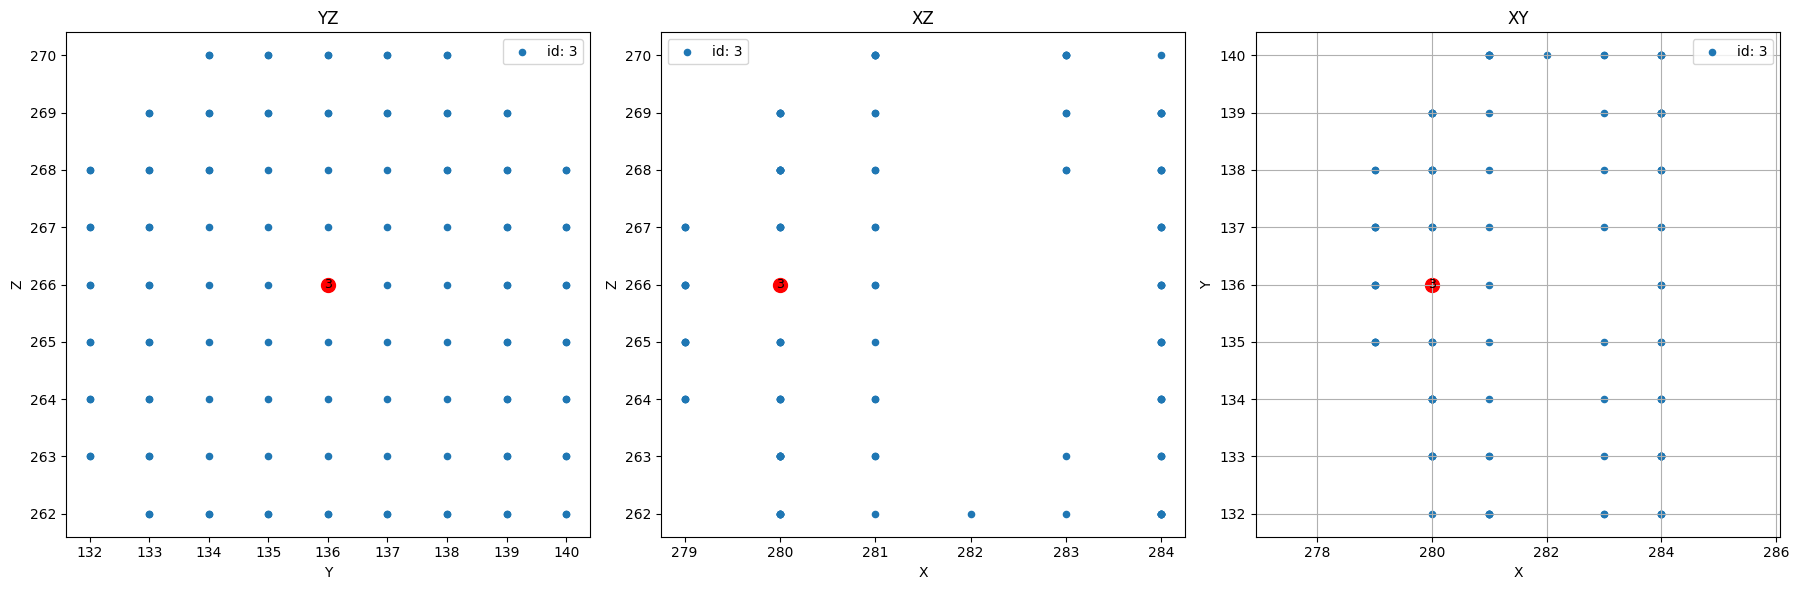

In [25]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1行2列子图

for idx, ((cx, cy, cz), boundary_points) in enumerate(p_bounds.items()):
    if not boundary_points:
        continue
    if idx != 3:
        continue
    
    bp = np.array(boundary_points)
    print(len(bp))

    # ✅ 确认这是正确的 XY 顺序！（有可能你需要换成 bp[:, 2], bp[:, 1] 视情况）
    x = bp[:, 0]
    y = bp[:, 1]
    z = bp[:, 2]

    ax1.scatter(y, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax1.scatter(cy, cz, color='red', s=100, marker='o')
    ax1.text(cy, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    
    ax2.scatter(x, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax2.scatter(cx, cz, color='red', s=100, marker='o')
    ax2.text(cx, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    ax3.scatter(x, y, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax3.scatter(cx, cy, color='red', s=100, marker='o')
    ax3.text(cx, cy, f'{idx}', fontsize=9, ha='center', va='center')

ax1.set_title("YZ")
ax1.set_xlabel("Y")
ax1.set_ylabel("Z")
ax1.legend()
ax2.set_title("XZ")
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.legend()
ax3.set_title("XY")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()
